In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('features_112x112.csv')

In [3]:
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f12535,f12536,f12537,f12538,f12539,f12540,f12541,f12542,f12543,label
0,0.498039,0.450980,0.478431,0.462745,0.454902,0.501961,0.431373,0.431373,0.392157,0.388235,...,0.219608,0.211765,0.149020,0.141176,0.141176,0.137255,0.137255,0.137255,0.211765,0
1,0.168627,0.164706,0.121569,0.121569,0.117647,0.117647,0.113725,0.113725,0.109804,0.109804,...,0.494118,0.356863,0.447059,0.454902,0.462745,0.466667,0.470588,0.474510,0.474510,0
2,0.211765,0.137255,0.137255,0.137255,0.141176,0.141176,0.149020,0.211765,0.219608,0.141176,...,0.392157,0.431373,0.431373,0.501961,0.454902,0.462745,0.478431,0.450980,0.498039,0
3,0.474510,0.474510,0.470588,0.466667,0.462745,0.454902,0.447059,0.356863,0.494118,0.333333,...,0.109804,0.113725,0.113725,0.117647,0.117647,0.121569,0.121569,0.164706,0.168627,0
4,0.474510,0.490196,0.458824,0.513726,0.474510,0.490196,0.458824,0.513726,0.474510,0.490196,...,0.172549,0.176471,0.133333,0.125490,0.125490,0.133333,0.125490,0.129412,0.168627,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.486275,0.486275,0.482353,0.478431,0.474510,0.466667,0.458824,0.360784,0.501961,0.337255,...,0.113725,0.113725,0.113725,0.117647,0.117647,0.121569,0.121569,0.168627,0.172549,1
316,0.486275,0.505882,0.470588,0.529412,0.486275,0.505882,0.470588,0.529412,0.486275,0.505882,...,0.176471,0.180392,0.125490,0.133333,0.125490,0.125490,0.125490,0.129412,0.172549,1
317,0.215686,0.211765,0.207843,0.133333,0.133333,0.129412,0.125490,0.125490,0.121569,0.117647,...,0.345098,0.470588,0.482353,0.494118,0.501961,0.509804,0.513726,0.517647,0.517647,1
318,0.172549,0.129412,0.125490,0.125490,0.125490,0.133333,0.125490,0.180392,0.176471,0.133333,...,0.486275,0.529412,0.470588,0.505882,0.486275,0.529412,0.470588,0.505882,0.486275,1


In [4]:
X = df.drop(columns=['label'])
Y = df['label']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.fit_transform(X_test), columns=X_test.columns)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [8]:
len(np.cumsum(pca.explained_variance_ratio_))

256

In [9]:
pca.explained_variance_ratio_.shape

(256,)

In [10]:
X_train_trf.shape

(256, 256)

In [11]:
X_train_scaled.shape

(256, 12544)

In [12]:
"""Even though you set n_components=None, PCA cannot return more components than the number of samples. This is due to how PCA works under
the hood — it computes the eigenvectors of the covariance matrix, and that matrix's rank is at most min(n_samples, n_features)."""

"Even though you set n_components=None, PCA cannot return more components than the number of samples. This is due to how PCA works under\nthe hood — it computes the eigenvectors of the covariance matrix, and that matrix's rank is at most min(n_samples, n_features)."

In [13]:
np.cumsum(pca.explained_variance_ratio_)

array([0.34362745, 0.6810646 , 0.97198913, 0.98551814, 0.99006965,
       0.99449834, 0.99694718, 0.99880786, 0.99885331, 0.9988965 ,
       0.99893556, 0.99897041, 0.99899856, 0.99902467, 0.99905031,
       0.99907275, 0.99909422, 0.99911463, 0.99913334, 0.99915174,
       0.99916895, 0.99918607, 0.99920234, 0.99921825, 0.99923382,
       0.99924899, 0.99926412, 0.99927914, 0.9992938 , 0.99930814,
       0.99932203, 0.99933577, 0.99934935, 0.99936274, 0.99937582,
       0.99938847, 0.99940091, 0.99941249, 0.99942358, 0.99943424,
       0.99944459, 0.99945487, 0.99946482, 0.99947451, 0.99948407,
       0.99949325, 0.99950218, 0.99951098, 0.99951954, 0.99952787,
       0.9995359 , 0.99954382, 0.99955173, 0.99955932, 0.99956672,
       0.99957386, 0.99958087, 0.99958772, 0.99959454, 0.99960114,
       0.99960761, 0.99961391, 0.99962013, 0.9996263 , 0.9996323 ,
       0.99963826, 0.99964411, 0.99964988, 0.9996556 , 0.99966129,
       0.99966681, 0.99967228, 0.9996777 , 0.99968303, 0.99968

In [14]:
np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.97) + 1

3

In [15]:
#Moving forward with 3 components as it explains over 97% variance of the data

In [16]:
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [17]:
X_train_trf.shape

(256, 3)

In [18]:
X_test_trf.shape

(64, 3)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the model
rf_clf = RandomForestClassifier(
    n_estimators=100,        # number of trees
    max_depth=None,          # depth of each tree (None = expand until all leaves are pure)
    random_state=42          # for reproducibility
)

# Train the model
rf_clf.fit(X_train_trf, y_train)

# Predict on train and test data
y_train_pred = rf_clf.predict(X_train_trf)
y_test_pred = rf_clf.predict(X_test_trf)

# Evaluate
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))  # Use y_test_pred here

Training Accuracy: 1.0
Testing Accuracy: 0.578125

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.68      0.67        40
           1       0.43      0.42      0.43        24

    accuracy                           0.58        64
   macro avg       0.55      0.55      0.55        64
weighted avg       0.57      0.58      0.58        64



In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees
    'max_depth': [None, 10, 20, 30],       # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', 0.5], # Number of features to consider for the best split (fraction, 'sqrt', 'log2')
    'bootstrap': [True, False],             # Whether bootstrap samples are used when building trees
    'criterion': ['gini', 'entropy'],      # The function to measure the quality of a split
}

# Create the model
rf_clf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    cv=5,                           # 5-fold cross-validation
    n_jobs=-1,                      # Use all cores for faster processing
    verbose=2,                      # Show progress
    scoring='accuracy',
    error_score='raise' # Metric for optimization
)

# Fit GridSearchCV
grid_search.fit(X_train_trf, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Output the best parameters and score
print("Best Parameters:", best_params)
print("Best Cross-validation Accuracy:", best_score)

# Use the best model for predictions
best_rf_clf = grid_search.best_estimator_

# Predict on train and test data
y_train_pred = best_rf_clf.predict(X_train_trf)
y_test_pred = best_rf_clf.predict(X_test_trf)

# Evaluate
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_spl

In [20]:
final_rf_clf = RandomForestClassifier(
    bootstrap=False,
    criterion='gini',
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)

# Train the model on the full training set
final_rf_clf.fit(X_train_trf, y_train)

# Predict on train and test data
y_train_pred = final_rf_clf.predict(X_train_trf)
y_test_pred = final_rf_clf.predict(X_test_trf)

# Evaluate
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))

Training Accuracy: 0.91796875
Testing Accuracy: 0.546875

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.66      0.57      0.61        40
           1       0.41      0.50      0.45        24

    accuracy                           0.55        64
   macro avg       0.54      0.54      0.53        64
weighted avg       0.57      0.55      0.55        64



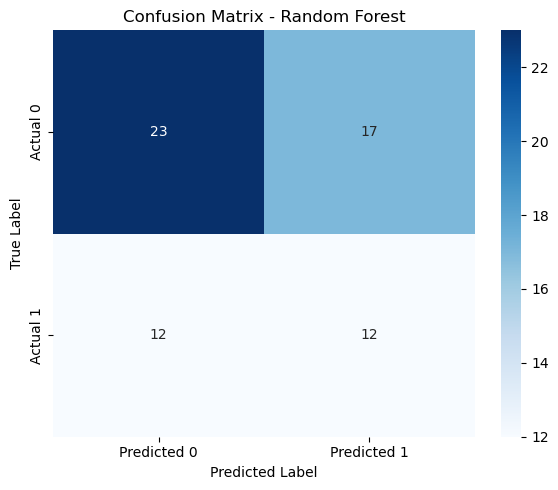

In [21]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()